In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print("Forma de los datos de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de los datos de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

Forma de los datos de entrenamiento: (60000, 28, 28, 1)
Forma de las etiquetas de entrenamiento: (60000, 10)
Forma de los datos de prueba: (10000, 28, 28, 1)
Forma de las etiquetas de prueba: (10000, 10)


In [ ]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax') # 10 clases para los dígitos del 0 al 9
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_base = model.fit(train_images, train_labels,
                               epochs=3,
                               batch_size=64,
                               validation_split=0.2, # 20% del training set como validación
                               verbose=0)

In [ ]:
loss_base, accuracy_base = model.evaluate(test_images, test_labels, verbose=0)

In [ ]:
model_l1 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.001)) # 10 clases para los dígitos del 0 al 9
    ])

model_l1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_l1 = model_l1.fit(train_images, train_labels,
                               epochs=3,
                               batch_size=64,
                               validation_split=0.2, # 20% del training set como validación
                               verbose=1)

loss_base_l1, accuracy_base_l1 = model.evaluate(test_images, test_labels, verbose=0)

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8366 - loss: 0.8561 - val_accuracy: 0.9657 - val_loss: 0.2662
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9690 - loss: 0.2370 - val_accuracy: 0.9668 - val_loss: 0.2163
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9706 - loss: 0.1902 - val_accuracy: 0.9739 - val_loss: 0.1786


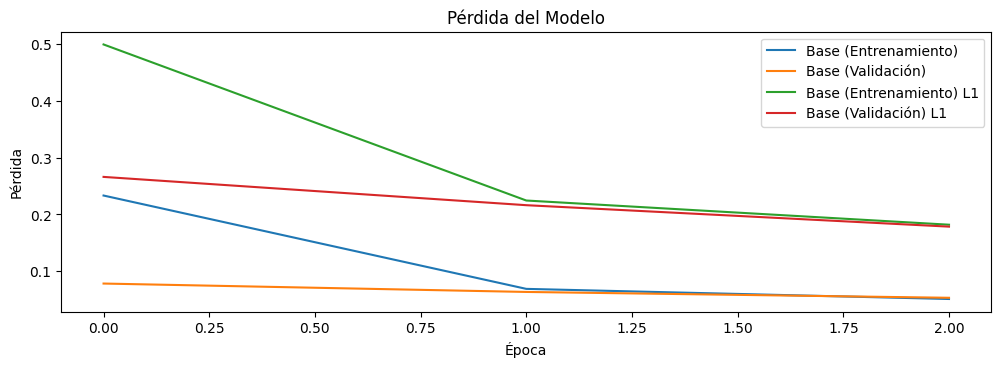

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_base.history['loss'], label='Base (Entrenamiento)')
plt.plot(history_base.history['val_loss'], label='Base (Validación)')
plt.plot(history_l1.history['loss'], label='Base (Entrenamiento) L1')
plt.plot(history_l1.history['val_loss'], label='Base (Validación) L1')
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

Hallazgos importantes

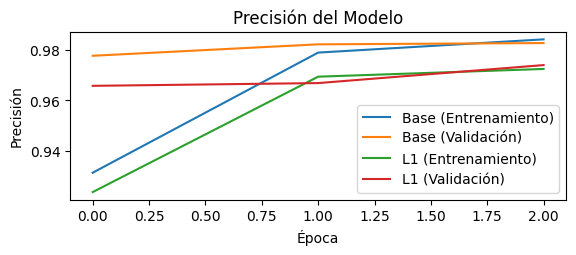

In [ ]:
# Graficamos la precisión de entrenamiento y validación para cada modelo.
plt.subplot(2, 1, 2)
plt.plot(history_base.history['accuracy'], label='Base (Entrenamiento)')
plt.plot(history_base.history['val_accuracy'], label='Base (Validación)')
plt.plot(history_l1.history['accuracy'], label='L1 (Entrenamiento)')
plt.plot(history_l1.history['val_accuracy'], label='L1 (Validación)')
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()